## out_cat comparison
Let's now compare the **out_cast** that we get with the one given by *Battaglia*

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from astropy.table import Table

let's divide if we're considering two times the light half radius or not

In [2]:
radius = True
if not radius:
    rh = ''
    out = 'Battaglia'
    title = ''
else:
    rh = '_2rh'
    out = 'Battaglia_2rh'
    title = '2 half-light radii'
    
print(rh)

_2rh


In [3]:
path = '../Data/'
dataPath = 'sextans/'

mt = Table.read(path+'utils/master_table_edr3_final.txt',format='ascii')
it = np.where((mt['name']=='Sextans'))
mt = mt[it]
output = Table.read(path+dataPath+'/out_cat/out_test_Sextans'+rh+'_eDR3.fits', format='fits')
output0 = Table.read(path+dataPath+'/out_test_Sextans_eDR3_'+out+'.fits', format='fits')

In [4]:
# check if I have double id_sources in my file

if len(np.unique(output['source_id'].data)) != len(output['source_id'].data):
    print('number of double id_sources in my file: ', len(output) - len(np.unique(output['source_id'])))
else:
    print('no double id_sources in my file')

no double id_sources in my file


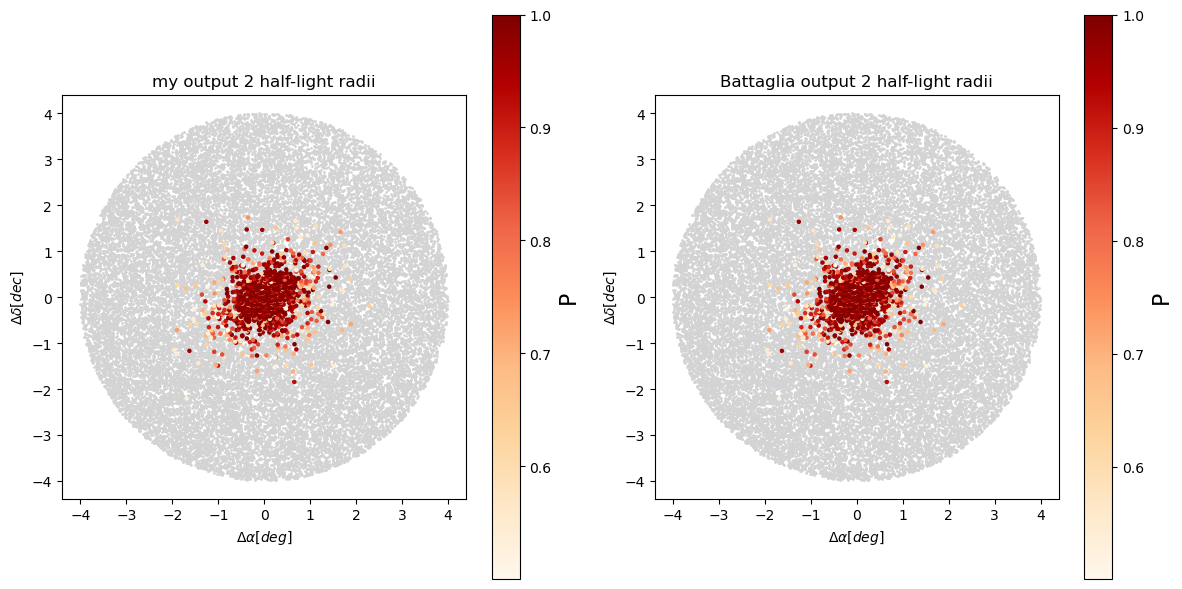

In [5]:
output_sextans_members = output[output['P'] >= 0.5]
output0_sextans_members = output0[output0['P'] >= 0.5]

# fontsize
fsize = 14

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.scatter((output['ra'] - mt['ra'][0]), (output['dec'] - mt['dec'][0]), c='lightgray', s=1)
cs1 = ax1.scatter((output_sextans_members['ra'] - mt['ra'][0]), (output_sextans_members['dec'] - mt['dec'][0]), 
            c=output_sextans_members['P'], cmap='OrRd', s=5)
ax1.set_xlabel(r'$\Delta \alpha [deg]$')
ax1.set_ylabel(r'$\Delta \delta [dec]$')
ax1.set_title('my output '+title)
ax1.set_aspect('equal')
cbar = fig.colorbar(cs1)
cbar.ax.set_ylabel('P',fontsize=fsize+2)

ax2.scatter((output0['ra'] - mt['ra'][0]), (output0['dec'] - mt['dec'][0]), c='lightgray', s=1)
cs2 = ax2.scatter((output0_sextans_members['ra'] - mt['ra'][0]), (output0_sextans_members['dec'] - mt['dec'][0]), 
            c=output0_sextans_members['P'], cmap='OrRd', s=5)
ax2.set_xlabel(r'$\Delta \alpha [deg]$')
ax2.set_ylabel(r'$\Delta \delta [dec]$')
ax2.set_title('Battaglia output '+title)
ax2.set_aspect('equal')
cbar = fig.colorbar(cs2)
cbar.ax.set_ylabel('P',fontsize=fsize+2)

plt.tight_layout()
fig.savefig(path+dataPath+'Comparison_plots/sextans_members'+rh+'.jpeg', bbox_inches='tight', dpi=150)

let's see $\Delta P$ between mine and the one given by Battaglia

In [6]:
delta_probability = []
print('number of sources (rows) in Battaglia file: ',len(output0))
print('number of sources (rows) in my file: ',len(output))

number of sources (rows) in Battaglia file:  32388
number of sources (rows) in my file:  32388


**Which are the extra sources?**

In [7]:
diff_sources = np.setdiff1d(np.int64(output['source_id'].data), np.int64(output0['source_id'].data))

print('number of extra sources in my file: ',len(diff_sources))
print(diff_sources)

number of extra sources in my file:  0
[]


In [8]:
# Get the P values for these common source_ids
prob_output0 = output0['P'].data
prob_output = output['P'].data

# Calculate delta probabilities
delta_probability = prob_output - prob_output0

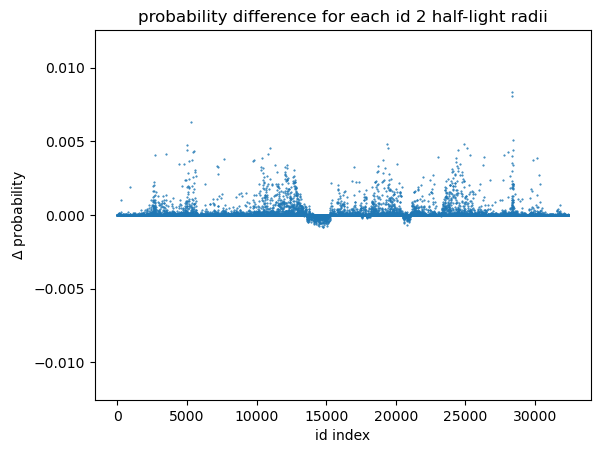

In [9]:
fig, ax = plt.subplots()
ax.plot(np.arange(0, len(delta_probability), 1), delta_probability, '.', markersize=1)
ax.set_ylim(-1.5*np.max(np.abs(delta_probability)), 1.5*np.max(np.abs(delta_probability)))
ax.set_xlabel('id index')
ax.set_ylabel(f'$\Delta$ probability')
ax.set_title('probability difference for each id '+title)
fig.savefig(path+dataPath+'Comparison_plots/sextans_probability_difference'+rh+'.jpeg', bbox_inches='tight', dpi=150)

Let's make a hist

number of sources with P>=0.95 in Battaglia file:  1152
number of sources with P>=0.95 in my file:  1152


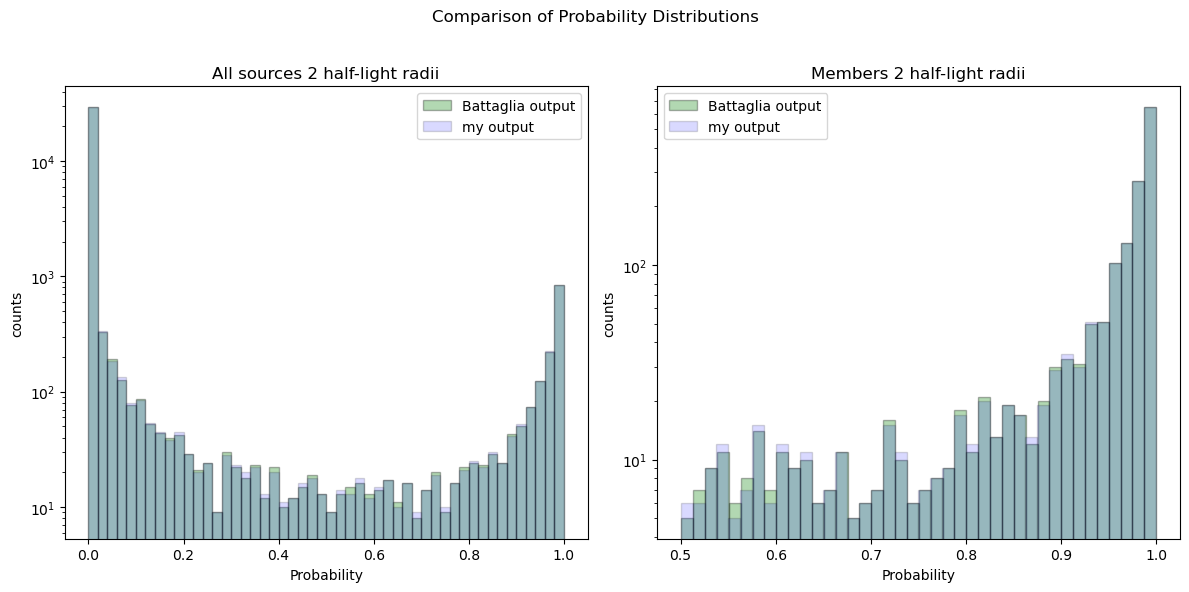

In [10]:
output0_members = output0[output0['P'] >= 0.5]
output_members = output[output['P'] >= 0.5]

print('number of sources with P>=0.95 in Battaglia file: ',len(output0[np.where(output0['P'] >= 0.95)]))
print('number of sources with P>=0.95 in my file: ',len(output[np.where(output['P'] >= 0.95)]))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.hist(output0['P'], bins=50, density=False, alpha=0.3, color='g', edgecolor='black', label='Battaglia output')
ax1.hist(output['P'], bins=50, density=False, alpha=0.15, color='blue', edgecolor='black', label='my output')
ax1.set_yscale('log')
ax1.set_xlabel('Probability')
ax1.set_ylabel('counts')
ax1.set_title('All sources '+title)
ax1.legend()

ax2.hist(output0_members['P'], bins=40, density=False, alpha=0.3, color='g', edgecolor='black', label='Battaglia output')
ax2.hist(output_members['P'], bins=40, density=False, alpha=0.15, color='blue', edgecolor='black', label='my output')
ax2.set_yscale('log')
ax2.set_xlabel('Probability')
ax2.set_ylabel('counts')
ax2.set_title('Members '+title)
ax2.legend()

fig.suptitle('Comparison of Probability Distributions')

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to make room for the main title
fig.savefig(path+dataPath+'Comparison_plots/sextans_probability_distribution'+rh+'.jpeg', bbox_inches='tight', dpi=150)

We can see that we don't have the exact probability of membership for the same object

In [11]:
members_output0 = output0[np.where(output0['P'] >= 0.95)]
members_output = output[np.where(output['P'] >= 0.95)]

common_source_ids, ia, ib = np.intersect1d(np.int64(members_output0['source_id'].data), np.int64(members_output['source_id'].data), return_indices=True)

print('number of sources with P>=0.95 in Battaglia file: ',len(members_output0))
print('number of sources with P>=0.95 in my file: ',len(members_output))

number of sources with P>=0.95 in Battaglia file:  1152
number of sources with P>=0.95 in my file:  1152


Let's see If I have double sources in my output file with another method

In [12]:
import pandas as pd

# Convert to pandas DataFrame
output_pd = output.to_pandas()

# Check for duplicate 'source_id' values
duplicates = output_pd[output_pd['source_id'].duplicated()]

if not duplicates.empty:
    print('Duplicate id_source values found:')
    print(duplicates)
else:
    print('No duplicate id_source values found.')

No duplicate id_source values found.
